# Creating the user profile
The plan is to do some exploratory data analysis and get a good group of products to ask the user if they like. These products should be a good sample accross the distribution of the data. 

- Get a few products from each of the most popular categories
- Get all the most popular products
- Get a few products from each bucket of the most popular price ranges
- A few completely random products

Ask the user to upvote products they like, downvote products they dont like, then store that data in a df to get aggregated into the user profile.

### Optionally/alternatively
- Ask the user to select categories, stores, and prices that they like

In [6]:
import sys
print(sys.executable)


/Users/aidanbartlett/Desktop/info 376/AmazonRecommender/.venv/bin/python


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('../data/cleaned_amazon_products.csv')
print(f"Number of unique parent ASINs: {df['parent_asin'].nunique()} and total rows: {len(df)}")
# df.head()

Number of unique parent ASINs: 137269 and total rows: 137269


# Random sample of top categories

main_category
Video Games                  81255
Computers                    17235
All Electronics              14816
Cell Phones & Accessories     3884
Toys & Games                  2733
Name: count, dtype: int64


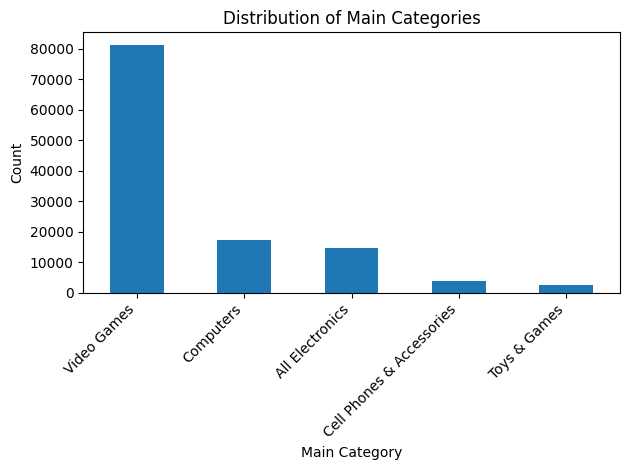

In [9]:
category_counts = df['main_category'].value_counts().head(5)
print(category_counts)
category_counts.plot(kind='bar')
plt.title("Distribution of Main Categories")
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
top_categories = df['main_category'].value_counts().head(5).index.tolist()
top_categories
top_df = df[df['main_category'].isin(top_categories)]
samples_per_category = 5
category_sample = top_df.groupby('main_category').apply(
    lambda x: x.sample(n=min(len(x), samples_per_category), random_state=42)
).reset_index(drop=True)
category_sample['sample_group'] = 'categories'

/var/folders/3l/xghg0s5j44sfmzy1dlqywkk00000gn/T/ipykernel_40870/604921342.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_sample = top_df.groupby('main_category').apply(


# Most rated sample

In [11]:
most_rated_products = df.nlargest(10, 'rating_number')
most_rated_products['sample_group'] = 'most_rated'

# Random sample

In [12]:
random_sample = df.sample(10, random_state=11)
random_sample['sample_group'] = 'random'

# Random sample of top price bins

/var/folders/3l/xghg0s5j44sfmzy1dlqywkk00000gn/T/ipykernel_40870/1759089216.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bin_sample = df.groupby('price_bin').apply(lambda x: x.sample(5, random_state=11)).reset_index(drop=True)
/var/folders/3l/xghg0s5j44sfmzy1dlqywkk00000gn/T/ipykernel_40870/1759089216.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  price_bin_sample = df.groupby('price_bin').apply(lambda x: x.sample(5, random_state=11)).reset_index(drop=True)


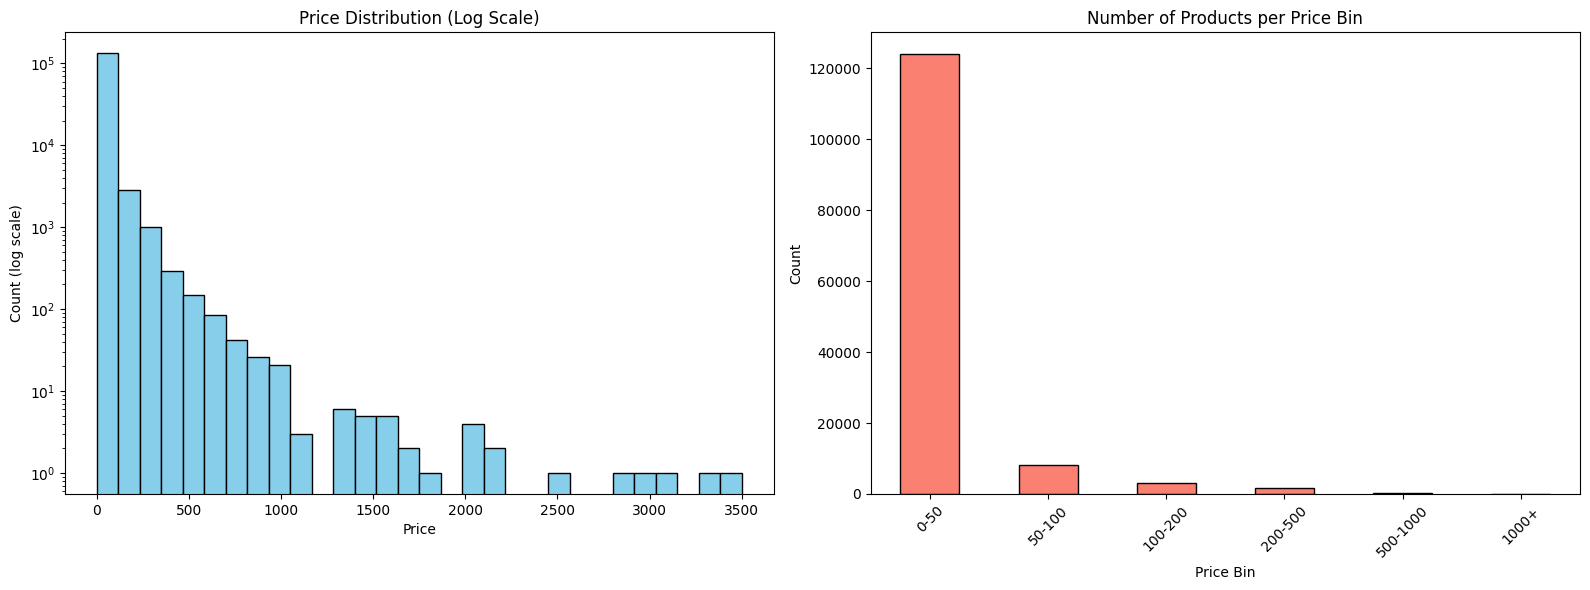

In [13]:
prices = df['price']
bins = [0, 50, 100, 200, 500, 1000, np.inf]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels)
price_bin_sample = df.groupby('price_bin').apply(lambda x: x.sample(5, random_state=11)).reset_index(drop=True)
price_bin_sample['sample_group'] = 'price'
bin_counts = df['price_bin'].value_counts().sort_index()
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left: Histogram of prices (log scale)
axes[0].hist(prices, bins=30, log=True, color='skyblue', edgecolor='black')
axes[0].set_title("Price Distribution (Log Scale)")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count (log scale)")

# Right: Bar plot of price bins
bin_counts.plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title("Number of Products per Price Bin")
axes[1].set_xlabel("Price Bin")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [17]:
all_samples = pd.concat([category_sample, price_bin_sample, random_sample, most_rated_products]).drop_duplicates()

In [18]:
all_samples.to_csv('../data/amazon_product_samples.csv', index=False)

In [19]:
all_samples = pd.read_csv('../data/amazon_product_samples.csv')
all_samples.columns

Index(['Unnamed: 0', 'main_category', 'title', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'images', 'videos',
       'store', 'categories', 'details', 'parent_asin', 'merged_text',
       'sample_group', 'price_bin'],
      dtype='object')

In [ ]:
all_samples

,Unnamed: 0,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,merged_text,sample_group,price_bin
0,51579,All Electronics,Dxldfks Battery Pack for Oculus Quest 2 Access...,4.6,40,"[""🔋【Game To Your Heart's Content】:Enjoy 2-4hrs...",[],19.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Lightweight Battery Pack That Last...,Dxldfks,"['Video Games', 'PC', 'Virtual Reality', 'Head...",{'Product Dimensions': '4.53 x 1.21 x 1.02 inc...,B0BPWVVR1J,51579 All Electronics Dxldfks Battery Pack for...,categories,NaN
1,118535,All Electronics,CHENGDAO Mobile Smartphone Gaming Controller W...,3.1,283,['Smartphone Game Controller Wireless:Support ...,['CHENGDAO Smartphone Game Controller Wireless...,24.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],CHENGDAO,"['Video Games', 'PC', 'Accessories', 'Controll...",{'Package Dimensions': '6.4 x 4.4 x 2.2 inches...,B07MGFSG62,118535 All Electronics CHENGDAO Mobile Smartph...,categories,NaN
2,21954,All Electronics,GameSir F1 Joystick Grip Phone Game Controller...,3.7,117,[],[],24.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],GameSir,"['Video Games', 'PC', 'Accessories', 'Controll...",{'Package Dimensions': '7.28 x 4.92 x 1.97 inc...,B078KC76Z1,21954 All Electronics GameSir F1 Joystick Grip...,categories,NaN
3,11319,All Electronics,Tilted Nation RGB Gaming Headset Stand - 3 in ...,4.7,4110,['FUNCTIONAL 3 IN 1 DESIGN: The RGB gaming hea...,[],49.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Tilted Nation RGB Headset Stand Mo...,Tilted Nation,"['Video Games', 'PC', 'Accessories', 'Headsets']",{'Package Dimensions': '14.53 x 8.66 x 6.06 in...,B09G6G2DJ1,11319 All Electronics Tilted Nation RGB Gaming...,categories,NaN
4,96209,All Electronics,Scettar C44 programmable Wired Gaming Mouse wi...,2.2,4,['【12 programmable buttons configuration】：12 p...,[],11.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Details of mouse products', 'url':...",Scettar,"['Video Games', 'PC', 'Accessories', 'Gaming M...",{'Package Dimensions': '5.47 x 4.33 x 1.93 inc...,B0BL6P47RX,96209 All Electronics Scettar C44 programmable...,categories,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,49650,Video Games,DualShock 4 Wireless Controller for PlayStatio...,4.7,124073,"['The feel, shape, and sensitivity of the dual...","[""The DualShock 4 Wireless Controller features...",57.00,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'PS4 Dualshock 4 Controller PROS an...,PlayStation,"['Video Games', 'PlayStation 4', 'Accessories'...","{'Release date': 'October 5, 2016', 'Best Sell...",B077GG9D5D,49650 Video Games DualShock 4 Wireless Control...,most_rated,NaN
71,70181,All Electronics,amFilm Tempered Glass Screen Protector for Nin...,4.8,110368,['Specifically designed for the 6.2-inch Ninte...,[],8.91,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': ""I've Been Using This Since 2017! ""...",amFilm,"['Video Games', 'Nintendo Switch', 'Accessorie...","{'Product Dimensions': '7.09""L x 3.94""W', 'Ite...",B01N3ASPNV,70181 All Electronics amFilm Tempered Glass Sc...,most_rated,NaN
72,68390,Movies & TV,Dr. Seuss' The Grinch / Le Grincheux,4.8,106015,[],['3'],14.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Benedict Cumberbatch (Actor), Cameron See...","['Video Games', 'PlayStation 4', 'Games']","{'Genre': 'Kids & Family, Animation', 'Format'...",B07KCS4WNQ,68390 Movies & TV Dr. Seuss' The Grinch / Le G...,most_rated,NaN
73,20160,Video Games,$45 Nintendo eShop Gift Card [Digital Code],4.7,103760,['Give the gift of fun with a Nintendo eShop g...,[],45.00,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'How To Redeem A Nintendo Gift Card...,Nintendo,"['Video Games', 'Online Game Services', 'Ninte...","{'Release date': 'January 1, 1970', 'Best Sell...",B07ZJ6RY1W,20160 Video Games $45 Nintendo eShop Gift Card...,most_rated,NaN
